## Table of content
1. [Loading data](#ch1) 
2. [Data Cleaning](#ch2)
  * [Duplicates removal](#sec2.1)
  * [Missing values handling](#sec2.2)
  * [Adjusting datatypes](#sec2.3)
3. [EDA](#CH3)
4. [svm](#ch4)
5. [Decision Tree classifier and Random Forest](#ch5)
6. [Logistic Regression](#ch6)

In [97]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import OneHotEncoder
%matplotlib inline 

In [98]:
import itertools
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
from mlxtend.preprocessing import shuffle_arrays_unison
import seaborn as sns
from tqdm.notebook import tqdm_notebook as tqdm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

## 1. Loading Data  <a  class='anchor' id='ch1'> </a>

In [99]:
data=pd.read_csv("aug_train.csv",sep=",",index_col=False)
data.head()
data_imputed=data.copy()

In [100]:
data.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [101]:
# dataa shape and then description 
print(data.shape)
print(data.dtypes)


(19158, 14)
enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
target                    float64
dtype: object


In [102]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

1. We can see that most od the data is categorical 
2. we can alos note that we have alot of missing values in gender, enorlled university, edu level, major discpline , company size and comapy type and last neew jobs  

## 2. Data Cleaning 

### A. Duplicates values check and removal 

In [104]:
### Check duplicates 
sum(data.duplicated())

0

In [105]:
## REMOVING DUPLICATES 
data.drop_duplicates(inplace=True)
print("check duplicates after removal",sum(data.duplicated()))

check duplicates after removal 0


### B. Handling Misssing Values  

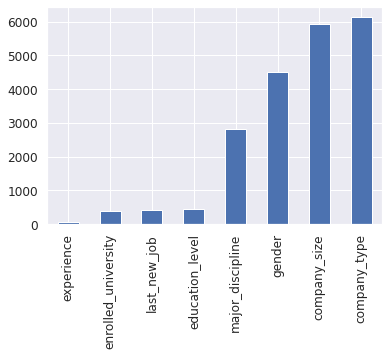

In [106]:
missing = data.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace = True)
missing.plot.bar();

In [107]:
data.relevent_experience.value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [108]:
# now dealing with the first variable 

data.experience.replace(">20",21,inplace=True)
data.experience.replace('<1',0,inplace=True)
data.experience.value_counts()

# here we will later impute the missing values 
data_imputed.experience.replace(">20",21,inplace=True)
data_imputed.experience.replace('<1',0,inplace=True)

In [109]:
# now let's see the zeros 
#data.experience=data.experience.astype('int')
data[data.experience.isna()] 
# when we print the above line we will find that the missing data is random hence we will impute it with the median 
data.experience.fillna(value=data.experience.median(),inplace=True)
print("number of missing values now ",sum(data.experience.isna()))
data.experience=data.experience.astype('int')


number of missing values now  0


In [110]:
#second variable imputing the enrolled universtiy  
data.enrolled_university= data.enrolled_university.astype('category')
data.enrolled_university = data.enrolled_university.cat.add_categories(['MISSING'])
data.enrolled_university = data.enrolled_university.fillna('MISSING')


clean1={'no_enrollment':0,'Part time course':1,'Full time course':2}
data_imputed.enrolled_university=data_imputed.enrolled_university.replace(clean1)



In [111]:
# third variable  
data.last_new_job.value_counts()
data.replace("never",0,inplace=True)
data.replace(">4",5,inplace=True)
data.last_new_job.fillna(data.last_new_job.median(),inplace=True);
data.last_new_job=data.last_new_job.astype('int')
print("----------------")
print("data after replaceing never with zero and  >4 with 5")
print(data.last_new_job.value_counts())


data_imputed.replace("never",0,inplace=True)
data_imputed.replace(">4",5,inplace=True)



----------------
data after replaceing never with zero and  >4 with 5
1    8463
5    3290
2    2900
0    2452
4    1029
3    1024
Name: last_new_job, dtype: int64


In [112]:
# fourth variable  
data['education_level']=data['education_level'].astype('category')
data['education_level']=data['education_level'].cat.add_categories(['MISSING'])
data['education_level']=data['education_level'].fillna('MISSING')


clean2={'Primary School':1,'High School':2,'Graduate':3,'Masters':4,'Phd':5}
data_imputed.education_level=data_imputed.education_level.replace(clean2)



In [113]:
# Fifth variable  
data['major_discipline']=data['major_discipline'].astype('category')
data['major_discipline']=data['major_discipline'].cat.add_categories(['MISSING'])
data['major_discipline']=data['major_discipline'].fillna('MISSING')

data_imputed['major_discipline']=data_imputed['major_discipline'].astype('category')
data_imputed['major_discipline']=data_imputed['major_discipline'].cat.add_categories(['MISSING'])
data_imputed['major_discipline']=data_imputed['major_discipline'].fillna('MISSING')


In [114]:
# SIX VARIABLE 
data['gender']=data['gender'].astype('category')
data['gender']=data['gender'].cat.add_categories(['MISSING'])
data['gender']=data['gender'].fillna('MISSING')

clean3={'Other':0,'Female':1,'Male':2}
data_imputed.gender=data_imputed.gender.replace(clean3)



In [115]:
data.company_type.value_counts()

Pvt Ltd                9817
Funded Startup         1001
Public Sector           955
Early Stage Startup     603
NGO                     521
Other                   121
Name: company_type, dtype: int64

In [116]:
data['company_size']=data['company_size'].astype('category')
data['company_size']=data['company_size'].cat.add_categories(['MISSING'])
data['company_size']=data['company_size'].fillna('MISSING')

data['company_type']=data['company_type'].astype('category')
data['company_type']=data['company_type'].cat.add_categories(['MISSING'])
data['company_type']=data['company_type'].fillna('MISSING')



clean4={'<10':1,'10/49':2,'50-99':3,'100-500':4,'500-999':5,'1000-4999':6,'5000-9999':7,'10000+':8}
data_imputed.company_size=data_imputed.company_size.replace(clean4)
data_imputed['company_type']=data_imputed['company_type'].astype('category')
data_imputed['company_type']=data_imputed['company_type'].cat.add_categories(['MISSING_companyType'])
data_imputed['company_type']=data_imputed['company_type'].fillna('MISSING_companyType')
clean5={'Other':'other_companyType'}
data_imputed.company_type=data_imputed.company_type.replace(clean5)


In [117]:
# NOW CHECKING THE MISSING VALUES  
data.isna().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

### C. Adjusting Datatypes  


In [118]:
# we have modified the data type of experience 
# now we want to adjut both the city column and last_new_job 

In [119]:
# First for last_new-job 


In [120]:
# now removing the irrelevant data which is city in every row 
data.city=data['city'].str.replace('city_','').astype(int)
data.head()

data_imputed.city=data_imputed['city'].str.replace('city_','').astype(int)


## 4. EDA  


### A. first let's see the distribution of our target variable 


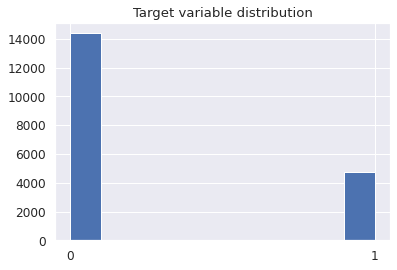

In [121]:
plt.hist(data=data,x='target');
plt.title("Target variable distribution")
plt.xticks([0,1]);

from the above we can see that the number of people who are classified as zero
are much greater than those who are classified as ones which means that our data is imbalanced and we need to deal with it 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


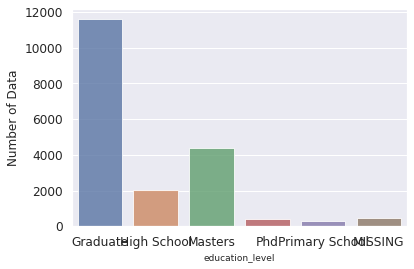

In [122]:
Education = data['education_level'].value_counts()  
plt.figure(figsize=(6,4))
sns.barplot(Education.index, Education.values, alpha=0.8)
plt.ylabel('Number of Data', fontsize=12)
plt.xlabel('education_level', fontsize=9)
plt.show();

Text(0.5, 1.0, 'Correlation between features')

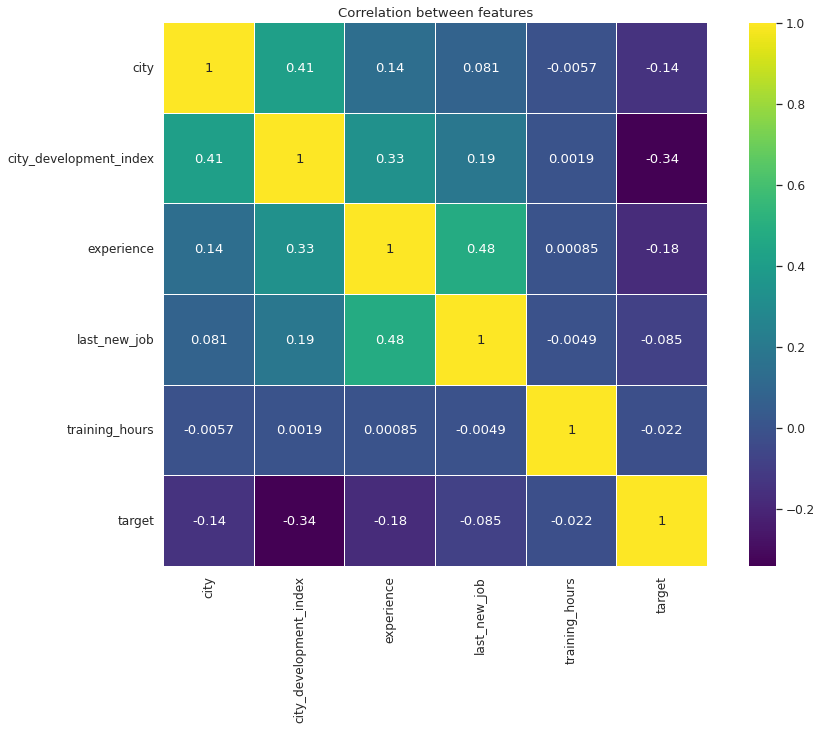

In [123]:
### B. let's now see the correlation matrix 
corrMatrix=data[["city","city_development_index","gender","relevent_experience","enrolled_university","education_level",
                   "major_discipline","experience","last_new_job","training_hours","target"]].corr()

sns.set(font_scale=1.10)
plt.figure(figsize=(15, 10))

sns.heatmap(corrMatrix,  linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between features')

### C. Feature Engineering  

---



In [124]:
qualitative = data.select_dtypes(exclude= ['int64', 'float64'])
qualitative.drop("relevent_experience",axis=1,inplace=True)
qualitative.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,gender,enrolled_university,education_level,major_discipline,company_size,company_type
0,Male,no_enrollment,Graduate,STEM,MISSING,MISSING
1,Male,no_enrollment,Graduate,STEM,50-99,Pvt Ltd
2,MISSING,Full time course,Graduate,STEM,MISSING,MISSING
3,MISSING,MISSING,Graduate,Business Degree,MISSING,Pvt Ltd
4,Male,no_enrollment,Masters,STEM,50-99,Funded Startup


In [125]:
# encoding relevent experience
data["relevent_experience"] = np.where(data["relevent_experience"].str.contains("Has "), 1.0, 0.0)
data_imputed["relevent_experience"] = np.where(data_imputed["relevent_experience"].str.contains("Has "), 1.0, 0.0)


In [126]:
y_train=data['target']
x_train = data.loc[:, data.columns != 'target']
ohe = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', ohe, qualitative.columns)],
        remainder="passthrough")
X_train_encoded = preprocessor.fit_transform(x_train)


In [127]:
X_train_encoded.shape

(19158, 44)

In [128]:
# for the imputed data we will not impute the value of major_discpline
# as we cannot assume ordinal numbers forits values

ohe = OneHotEncoder()
oe_results = ohe.fit_transform(data_imputed[["major_discipline"]])
pd.DataFrame(oe_results.toarray(), columns=ohe.categories_).head()
data_imputed = data_imputed.join(pd.DataFrame(oe_results.toarray(), columns=ohe.categories_))

oe_company = ohe.fit_transform(data_imputed[["company_type"]])
pd.DataFrame(oe_company.toarray(), columns=ohe.categories_).head()
data_imputed = data_imputed.join(pd.DataFrame(oe_company.toarray(), columns=ohe.categories_))

data_imputed.drop(['target','major_discipline','company_type'], axis=1, inplace=True)


In [129]:
#x imputed 
X_trainimputed, X_testimputed, y_trainimputed, y_testimputed = train_test_split(data_imputed, y_train, test_size=0.1, random_state=42)

In [130]:
#x encoded 
X_train, X_test, y_train, y_test = train_test_split(X_train_encoded, y_train, test_size=0.1, random_state=42)

In [131]:
imputer = KNNImputer(n_neighbors=7, weights="uniform");
X_trainimputed=imputer.fit_transform(X_trainimputed);
X_testimputed= imputer.transform(X_testimputed)
print("the shape of the imputed data using the oridunal encoding instead of OHE is",X_trainimputed.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  FutureWarning,


the shape of the imputed data using the oridunal encoding instead of OHE is (17242, 25)


In [132]:
# SMOTE Oversampling For Imbalanced Dataset
smote = SMOTE(random_state=42)

X_train, y_train= smote.fit_resample(X_train,y_train )
X_trainimputed, y_trainimputed= smote.fit_resample(X_trainimputed,y_trainimputed )

# Check the number of records after over sampling
print(sorted(Counter(y_trainimputed).items()))

[(0.0, 12923), (1.0, 12923)]


##4. SVM 

In [ ]:
#x encoded
param_tuning = {'C': [8,9,10],
                'gamma': [0.01, 0.001],
              'kernel': ['rbf']}

model_svm = GridSearchCV(SVC(), param_tuning,cv=10,scoring='accuracy') 
model_svm.fit(X_train, y_train)

#x encoded
print(model_svm.best_score_)
print(model_svm.best_params_)

In [ ]:
svm = SVC(C=9,gamma=0.01, kernel='rbf')
svm.fit(X_train,y_train)
y_pred=svm.predict(X_test)
print('confusion matrix')
print(confusion_matrix(y_test, y_pred))
print('recall score')
print(recall_score(y_test, y_pred))
print('f1 score')
print(f1_score(y_test, y_pred))
print('precision accuracy ')
print(precision_score(y_test, y_pred))
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

confusion matrix
[[1314  126]
 [ 468  969]]
recall score
0.6743215031315241
f1 score
0.7654028436018957
precision accuracy 
0.8849315068493151
Accuracy Score:
0.7935349322210636


In [ ]:
#x imputed
from sklearn.model_selection import GridSearchCV
param_tuningimputed = {'C': [9,10],
              'gamma': [0.01, 0.001],
              'kernel': ['rbf']}

model_svmimputed = GridSearchCV(SVC(), param_tuningimputed,cv=10,scoring='accuracy') 
model_svmimputed.fit(X_trainimputed, y_trainimputed)
print(model_svmimputed.best_score_)
print(model_svmimputed.best_params_)

In [ ]:
#x imputed
svm = SVC(C=9,gamma=0.01, kernel='rbf')
svm.fit(X_trainimputed,y_trainimputed)
y_pred=svm.predict(X_testimputed)
print('confusion matrix')
confusion_matrix(y_testimputed, y_pred)
print('recall score')
print(recall_score(y_testimputed, y_pred))
print('f1 score')
print(f1_score(y_testimputed, y_pred))
print('precision accuracy ')
print(precision_score(y_testimputed, y_pred))
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

confusion matrix
recall score
0.6743215031315241
f1 score
0.7657052548399843
precision accuracy 
0.8857404021937842
Accuracy Score:
0.7938825165102538


## 5. Decision Tree classifiers  

In [ ]:
clf = DecisionTreeClassifier()
hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,9),'min_samples_split':np.arange(10,100,10) }

grid = GridSearchCV(clf, param_grid  = hp  , cv = 5)
grid.fit(X_train,y_train)
print("best results",grid.best_score_)
print(f"Best result {grid.best_params_}")

y_pred= grid.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

best results 0.8389028394823257
Best result {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 90}
Accuracy Score:
0.8442822384428224


In [ ]:
#Confusion Matrix 
confusion_matrix(y_test, y_pred)

array([[1215,  225],
       [ 223, 1214]])

In [ ]:
#Recall Score 
recall_score(y_test, y_pred)

0.8448155880306193

In [ ]:
#F1 Score 
f1_score(y_test, y_pred)

0.8442280945757997

In [ ]:
#Accurazy 
precision_score(y_test, y_pred)

0.8436414176511466

In [ ]:
clf = DecisionTreeClassifier()
hp = {"criterion":['gini'], 'max_depth':[8],'min_samples_split':np.arange(80,99,2) }

grid2 = GridSearchCV(clf, param_grid  = hp  , cv = 5)
grid2.fit(X_train,y_train)
print("best results",grid2.best_score_)
print(f"Best result {grid2.best_params_}")

y_pred= grid2.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))

best results 0.83894147189492
Best result {'criterion': 'gini', 'max_depth': 8, 'min_samples_split': 92}
Accuracy Score:
0.8442822384428224


In [ ]:
#Confusion Matrix 
confusion_matrix(y_test, y_pred)

array([[1215,  225],
       [ 223, 1214]])

In [ ]:
#Recall Score 
recall_score(y_test, y_pred)

0.8448155880306193

In [ ]:
#F1 Score 
f1_score(y_test, y_pred)

0.8442280945757997

In [ ]:
#Accurazy 
precision_score(y_test, y_pred)

0.8436414176511466

now let's try the data which was cleaned via knn imputer

In [ ]:
clf = DecisionTreeClassifier()
hp = {"criterion":['gini','entropy'], 'max_depth':np.arange(3,9),'min_samples_split':np.arange(10,100,10) }

grid = GridSearchCV(clf, param_grid  = hp  , cv = 5)
grid.fit(X_trainimputed,y_trainimputed)
print("best results",grid.best_score_)
print(f"Best result {grid.best_params_}")

y_pred= grid.predict(X_testimputed)
print('Accuracy Score:')
print(metrics.accuracy_score(y_testimputed,y_pred))

print('confusion matrix')
confusion_matrix(y_test, y_pred)
print('recall score')
recall_score(y_test, y_pred)
print('f1 score')
f1_score(y_test, y_pred)
print('precision accuracy ')
precision_score(y_test, y_pred)

##  Random Forest Tree

In [ ]:
RF = RandomForestClassifier()
hp = {"criterion":['entropy','gini'], 'max_depth':np.arange(2,15),'min_samples_split':np.arange(5,50,5) }

grid_RF = GridSearchCV(RF, param_grid  = hp  , cv = 5)
grid_RF.fit(X_train,y_train)

print("best results",grid_RF.best_score_)
print(f"Best result {grid_RF.best_params_}")

y_pred= grid_RF.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


best results 0.8587985319683213
Best result {'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 5}
Accuracy Score:
0.8602711157455682


In [ ]:
#Confusion Matrix of the Smoted Model
print('confusion matrix')
confusion_matrix(y_test, y_pred)
print('recall score')
recall_score(y_test, y_pred)
print('f1 score')
f1_score(y_test, y_pred)
print('precision accuracy ')
precision_score(y_test, y_pred)

confusion matrix
recall score
f1 score
precision accuracy 


0.860125260960334

In [ ]:
RF = RandomForestClassifier()
hp = {"criterion":['gini'], 'max_depth':[14],'min_samples_split':np.arange(3,7) }

grid_RF2 = GridSearchCV(RF, param_grid  = hp  , cv = 5)
grid_RF2.fit(X_train,y_train)

print("best results",grid_RF2.best_score_)
print(f"Best result {grid_RF2.best_params_}")



y_pred= grid_RF2.predict(X_test)
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
print('confusion matrix')
confusion_matrix(y_test, y_pred)
print('recall score')
recall_score(y_test, y_pred)
print('f1 score')
f1_score(y_test, y_pred)
print('precision accuracy ')
precision_score(y_test, y_pred)

best results 0.8576395595904964
Best result {'criterion': 'gini', 'max_depth': 14, 'min_samples_split': 6}
Accuracy Score:
0.8581856100104275
confusion matrix
recall score
f1 score
precision accuracy 


0.8600419874037789

##6. Logistic Regression


In [133]:
#cross validation Logistic Regression
LR = LogisticRegression(penalty='l2',solver = 'liblinear')
scores = cross_val_score(LR, X_train, y_train, scoring='accuracy', cv=5, n_jobs=-1)
print('Average Score for Logistic Regreesion = {}%'.format(np.round(scores.mean()*100,2)))

Average Score for Logistic Regreesion = 74.49%


In [137]:
#GridSearch For Logistic Regression
param_grid = {'penalty': ['l1', 'l2'],
             'C': np.arange(0.5, 3, 0.5).tolist(),
             'fit_intercept':[True, False]}

log_model = LogisticRegression(solver = 'liblinear', max_iter=150)
grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search=grid.fit(X_train, y_train)

print(grid_search.best_params_)
print('Best Acc = ', grid_search.best_score_*100)

y_pred = grid_search.best_estimator_.predict(X_test) 
acc = accuracy_score(y_pred, y_test)
print('Accuracy of Logistic Regression = {}%'.format(np.round(acc*100,2)))

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))


{'C': 2.0, 'fit_intercept': False, 'penalty': 'l2'}
Best Acc =  74.5067279156016
Accuracy of Logistic Regression = 73.02%
Accuracy Score:
0.7301670146137788


In [ ]:
#GridSearch For Logistic Regression
param_grid = {'penalty': ['l1', 'l2'],
             'C': np.arange(0.5, 3, 0.5).tolist(),
             'fit_intercept':[True, False]}

log_model = LogisticRegression(solver = 'liblinear', max_iter=150)
grid = GridSearchCV(log_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search=grid.fit(X_trainimputed, y_trainimputed)

print(grid_search.best_params_)
print('Best Acc = ', grid_search.best_score_*100)

y_pred = grid_search.best_estimator_.predict(X_testimputed) 
acc = accuracy_score(y_pred, y_testimputed)
print('Accuracy of Logistic Regression = {}%'.format(np.round(acc*100,2)))

print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_pred))
print('confusion matrix')
confusion_matrix(y_test, y_pred)
print('recall score')
recall_score(y_test, y_pred)
print('f1 score')
f1_score(y_test, y_pred)
print('precision accuracy ')
precision_score(y_test, y_pred)


{'C': 2.0, 'fit_intercept': True, 'penalty': 'l2'}
Best Acc =  73.13502028201661
Accuracy of Logistic Regression = 73.31%
Accuracy Score:
0.7330552659019812
confusion matrix
recall score
f1 score
precision accuracy 


0.728952772073922